# Grid definition

Defines indices for grid elements which are increasing from left to right and going from down to up. (Interpretation depends on were you put origin. No matter were. Definition will hold and indices will always go row by row.)

In [1]:
import numpy as np

class Grid:
    """
    Class definition of the 2D grid. For now: NOT USED
    """
    
    def __init__(self, x, y, h, w):
        
        self.x = x # x-coordinate in grid
        self.y = y # y-coordinate in grid
        self.h = h # Height
        self.w = w # Width
                
    def position(self, i):
        x = i%self.w
        y = np.floor(i/self.w)
        return x, y
        
    def index(self, x, y):
        return y*self.w + x

# Linear convection
in 2D grid of 20x20

In [1]:
import numpy as np

class Element:
    
    def __init__(self, i, const):
        self.x = int(i % const.w) # x-coordinate in grid
        self.y = int(np.floor(i / const.w)) # y-coordinate in grid
        
        # Initialise the fluid (u = fluid velocity (2D))
        if (self.x >= 5 and self.x <= 10) and (self.y >= 5 and self.y <= 10): # IC
            self.u = 2
        else:
            self.u = 1
            
        self.u_new = None
            
        # Apply BC
        self.apply_bc(const)
        
    def boundary_check(self, const):
        return self.x == 0 or self.x == const.w-1 or self.y == 0 or self.y == const.h-1 # BC
        
    def apply_bc(self, const):
        if self.boundary_check(const):
            self.u = 1
            
    def calculate_u_new(self, const, neighbor_x, neighbor_y):
        if self.boundary_check(const):
            self.u_new = 1
            return
        
        self.u_new = self.u + const.c * const.dt * (
                (self.u - neighbor_x.u) / const.dx +
                (self.u - neighbor_y.u) / const.dy )
        
    def du(self):
        return self.u_new - self.u
    
    def apply_u(self):
        self.u = self.u_new
        
    def inspect(self):
        return "Element <x: {}, y: {}, u: {} -> {}>".format(self.x, self.y, self.u, self.u_new)
        
    def print(self):
        print(self.inspect())
    

In [2]:
def initialisation(const):
        n = const.h*const.w
        data = []
        for i in range(n): # Defines grid
            data.append(Element(i, const))
        return data

# Get the element left of a given "element", or None if there is none
def element_left_of(data, element, const):
    if (element.x == 0):
        return None
    return element_at(data, element.x - 1, element.y, const)

# Get the element below a given "element", or None if there is none
def element_below(data, element, const):
    if (element.y == 0):
        return None
    return element_at(data, element.x, element.y - 1, const)

# Get the element at a specific position (x, y)
def element_at(data, x, y, const):
    return data[index(x, y, const)]

# Get the index in "data" given an x, y and constants
def index(x, y, const):
    return int(y * const.w + x)
    
def time_step(data, const):    
    for element in data:
        # l = element_left_of(data, element, const)
        # b = element_below(data, element, const)
        # print("time stepping {}\n\tleft-of: {}\n\tbelow: {}".format(
        #    element.inspect(), 
        #    l if l is None else l.inspect(), 
        #    b if b is None else b.inspect()
        # ))
        element.calculate_u_new(const, element_left_of(data, element, const), element_below(data, element, const))
    return data

def is_stable(data, const):
    equilibrium = all(element.du() < const.epsilon for element in data)
    for element in data:
        element.apply_u()
    return equilibrium

def simulation(const):
    
    data = initialisation(const)
    
    counter = 0
    
    while True:
        counter += 1
        time_step(data, const)
        if is_stable(data, const):
            print('Equilibrium has been reached after ' + str(counter) + ' steps')
            return data
        elif counter == const.max_iterations:
            print('Maximum # iterations (' + str(counter) + ') has been reached')
            return data

In [5]:
from types import SimpleNamespace
const = SimpleNamespace(w = 20, h = 20, c = 1, dx = 1, dy = 1, dt = 0.2, max_iterations = 1, epsilon = 0.001)

data = simulation(const)

Maximum # iterations (1) has been reached


# Visualisation
Plot of the u in the grid

<IPython.core.display.Javascript object>


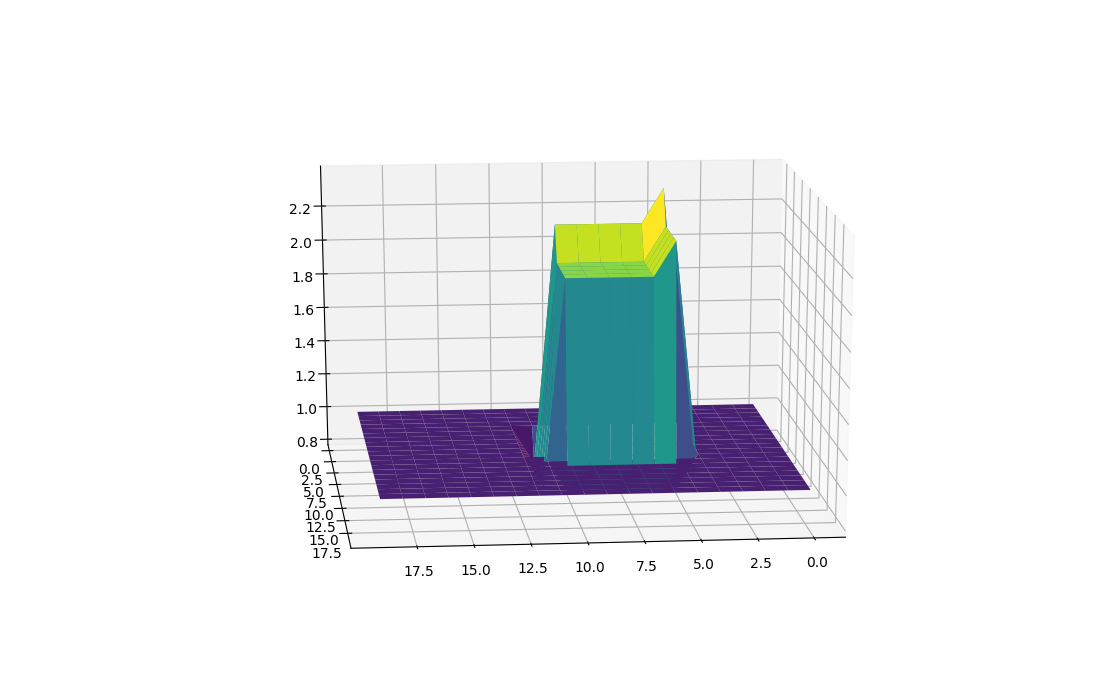

In [13]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(np.arange(const.w), np.arange(const.h))
u_plot = np.zeros((const.w, const.h), dtype=float)
for element in data:
    u_plot[element.x, element.y] = element.u

surf = ax.plot_surface(X, Y, u_plot, cmap = cm.viridis)
plt.show()

#### Easy visual check for BC and IC:

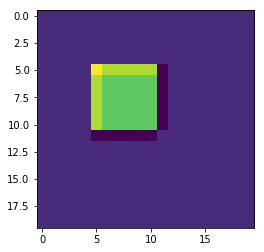

In [12]:
fig, ax = plt.subplots(1, figsize=(4,4), facecolor=(1,1,1))
ax.imshow(u_plot)
plt.show()